In [2]:
import numpy as np
import pandas as pd
from astropy import table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt 
from astropy import units as u
from astroquery.xmatch import XMatch
from astropy.table import Table, unique,vstack

In [3]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

In [4]:
data1 = Table.read('xmatch_planets.csv', format='ascii.csv')
data2 = Table.read('xmatch+2.csv', format='ascii.csv')

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1852881933.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 500)


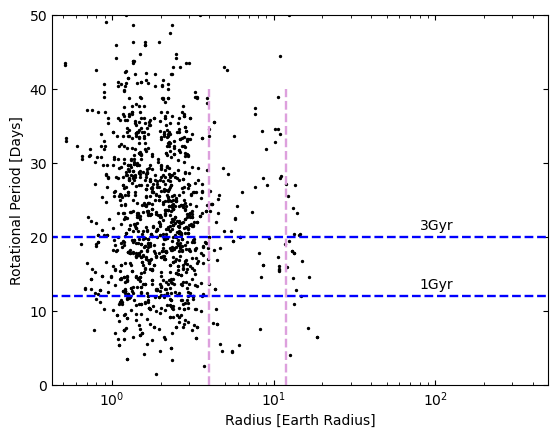

In [5]:
plt.scatter(data1['pl_rade'], data1['Prot'], s = 2, c = 'black') #data1['Teff'])
plt.scatter(data2['pl_rade'], data2['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.scatter(mcquillan_koi['Rp'], mcquillan_koi['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.yscale("log")
plt.xscale("log")
plt.ylim(0,50)
plt.xlim(0, 500)
plt.xlabel("Radius [Earth Radius]")
plt.ylabel("Rotational Period [Days]")
plt.hlines(12, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)
plt.hlines(20, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)

plt.vlines(4, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(12, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)


plt.text(80,13 , "1Gyr")
plt.text(80, 21 , "3Gyr")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

In [6]:
all_data = vstack([data1, data2], join_type='inner')



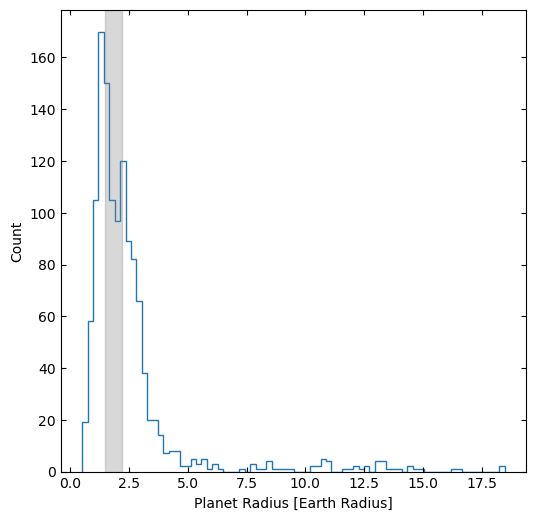

In [7]:
num_bins = freedman_diaconis_bins(all_data['pl_rade'])

## plotando figura

plt.figure(figsize=(6,6))
h, edges = np.histogram(all_data['pl_rade'],bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
#plt.xlim(0,20)

plt.axvspan(1.5, 2.2, alpha=0.3, color='gray')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
plt.show()

In [8]:
plot4 = all_data[all_data['pl_bmasse'] != 0 ]
plot4 = plot4[plot4['pl_dens'] != 0 ]

plot4 = plot4.to_pandas()

plot4 = plot4.dropna(subset=['pl_bmasse', 'pl_dens'])

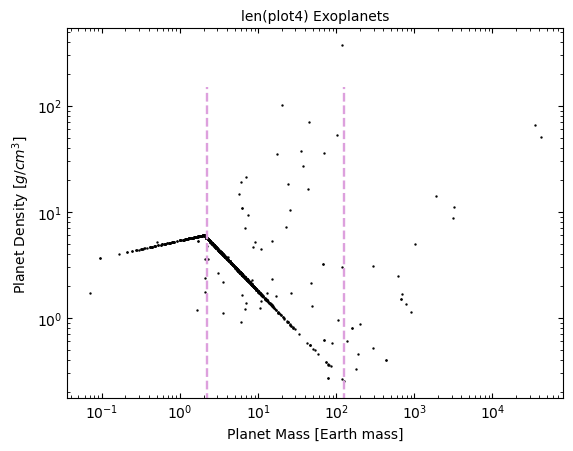

In [9]:
plt.scatter(plot4['pl_bmasse'], plot4['pl_dens'],
           s = 0.5,
           c = 'black')

plt.vlines(127, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(2.2, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.xscale("log")
plt.yscale("log")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel(r'Planet Density $[g/cm^3]$')
plt.title(r"len(plot4) Exoplanets", fontsize = 10)
plt.savefig('mass_densitu.png', dpi=500)

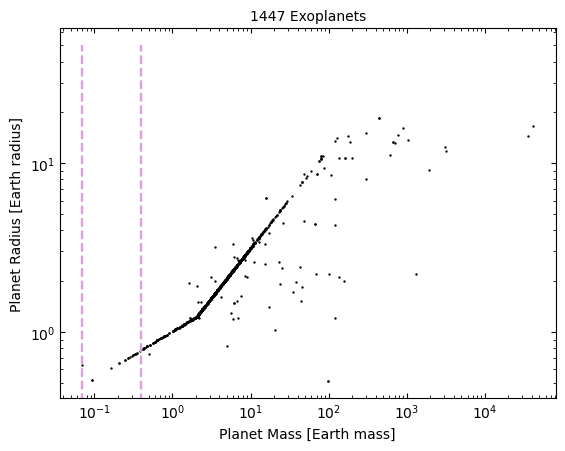

In [10]:
plt.scatter(all_data['pl_bmasse'], all_data['pl_rade'],
           s = 0.5,
           c = 'black')

plt.vlines(0.4, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(0.07, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)

plt.xscale("log")
plt.yscale("log")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel("Planet Radius [Earth radius]")
plt.title("1447 Exoplanets", fontsize = 10)
plt.savefig('mass_radius.png', dpi=500)

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1628860711.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e5)


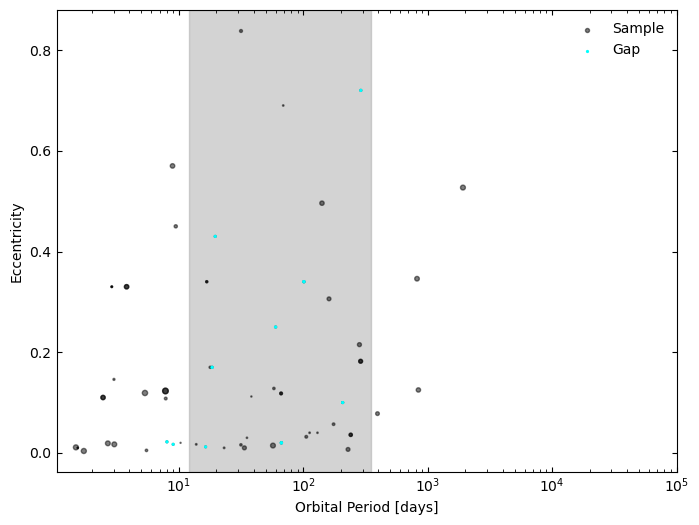

In [11]:
teste = all_data[all_data['pl_orbeccen'] != 0]
res1 = teste[(teste['pl_rade'] > 1.6) & (teste['pl_rade'] < 2.3)]

plt.figure(figsize=(8,6))

plt.axvspan(12, 350, alpha=0.5, color='darkgray')

plt.scatter(teste['pl_orbper'], teste['pl_orbeccen'], s =  teste['pl_radj'] * 10, 
            c = 'black', marker = 'o', alpha = 0.5, label = 'Sample') 

plt.scatter(res1['pl_orbper'], res1['pl_orbeccen'], s =  res1['pl_radj'] * 10, 
            c = 'aqua', marker = 'o', label = 'Gap') 

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.xlim(0,1e5)
plt.xlabel('Orbital Period [days]')
plt.ylabel('Eccentricity')
plt.legend(frameon=False)

plt.savefig('e_vs_orb_sample.png', dpi=500)


plt.show()


In [83]:
Vizier.ROW_LIMIT=-1
mcquillan_koi = Vizier.get_catalogs("J/ApJ/775/L11")[0]

In [84]:
mcquillan_koi = mcquillan_koi[mcquillan_koi['Porb'] != 0 ]
mcquillan_koi = mcquillan_koi[mcquillan_koi['Prot'] != 0 ]

mcquillan_koi = mcquillan_koi.to_pandas()

mcquillan_koi = mcquillan_koi.dropna(subset=['Prot', 'Porb', 'Teff'])

In [85]:
mcquillan_koi = mcquillan_koi[(mcquillan_koi['Rp'] < 2.1) & (mcquillan_koi['Rp'] > 1.7)]


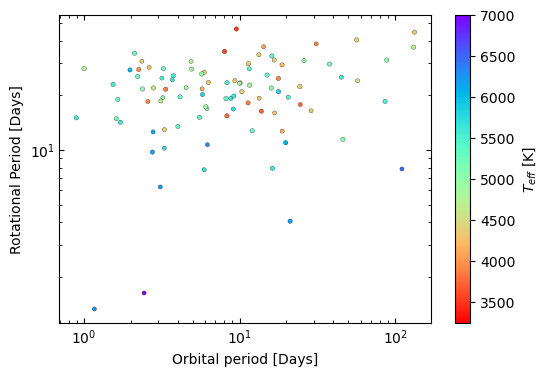

In [89]:
plt.figure(figsize=(6,4))
fig = plt.scatter(mcquillan_koi['Porb'], mcquillan_koi['Prot'], s = mcquillan_koi['Rp']*5 ,cmap = 'rainbow_r', c = mcquillan_koi['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')
#plt.legend(*fig.legend_elements("sizes", num=3))

#plt.savefig('orb_vs_rot.png', dpi=500)


In [91]:
mcquillan_koi[mcquillan_koi['Prot'] < 2]

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
353,1701,7222086,7065,4.07,1.73,2.439,1.637,0.0,0.37,,Simbad,297.51907,42.77706
602,2398,6199056,6257,4.17,1.80,1.169,1.337,0.0,0.50,,Simbad,289.93927,41.50266


In [33]:
temp1 = mcquillan_koi[(mcquillan_koi['Teff'] < 4000) & (mcquillan_koi['Teff'] > 0)]
temp2 = mcquillan_koi[(mcquillan_koi['Teff'] < 5000) & (mcquillan_koi['Teff'] > 4000)]
temp3 = mcquillan_koi[(mcquillan_koi['Teff'] < 6000) & (mcquillan_koi['Teff'] > 5000)]
temp4 = mcquillan_koi[mcquillan_koi['Teff'] > 6000]

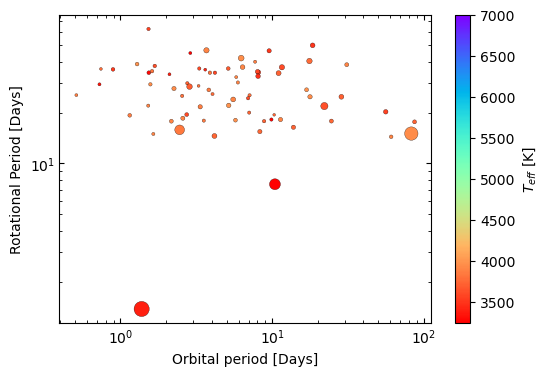

In [79]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')


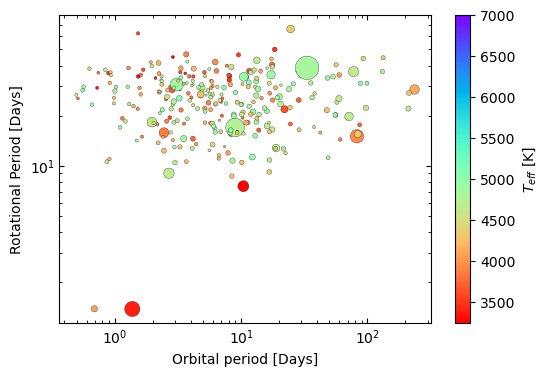

In [80]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp']*5 ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

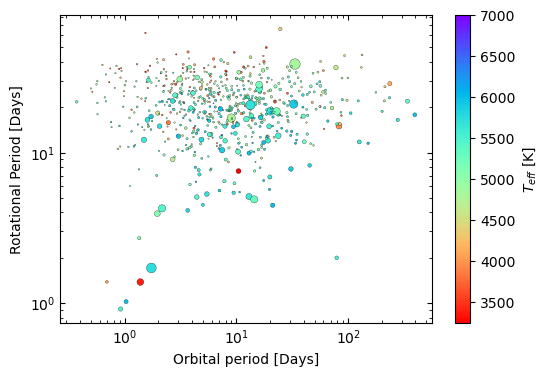

In [77]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

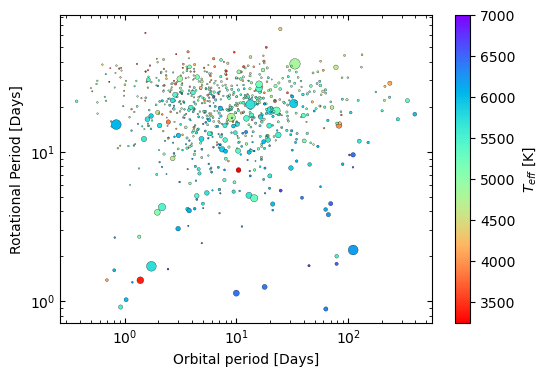

In [81]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp4['Porb'], temp4['Prot'], s = temp4['Rp'] ,cmap = 'rainbow_r', c = temp4['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')